In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang dianggap +
    print("AUC: %.2f" % auc(fpr, tpr))

In [5]:
import pandas as pd
df = pd.read_csv("fraud.csv")
df.head()

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,...,0,0,0,0,0,0,0,0,0,0
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,...,0,0,0,0,0,0,1,0,1,0
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,...,0,0,0,0,0,0,2,0,0,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,...,3,0,0,0,0,0,0,0,0,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,...,0,1,0,0,0,0,2,0,1,0


# Logistic Regression

In [6]:
# Split Feature and Label
X = df.drop(columns=['index','customerEmail','customerPhone','customerDevice','customerIPAddress','customerBillingAddress','Fraud','Fraud_Decoded'])
y = df['Fraud_Decoded'] # target

#Split data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### Prediction Result

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [9]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

#### Evaluation

In [10]:
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.56
Recall (Test Set): 0.67
F1-Score (Test Set): 0.61
AUC: 0.69


In [11]:
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.86


In [12]:
print('Train score: ' + str(model.score(X_train, y_train))) #Accuracy
print('Test score:' + str(model.score(X_test, y_test))) #Accuracy

Train score: 0.85
Test score:0.6976744186046512


### Hyperparameter Tuning

In [13]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] 
hyperparameters = dict(penalty=penalty, C=C)

logres = LogisticRegression(random_state=42) # Logres Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.90
Recall (Test Set): 0.60
F1-Score (Test Set): 0.72
AUC: 0.78


In [14]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.0001


In [15]:
print('Train score: ' + str(model.score(X_train, y_train))) #Accuracy
print('Test score:' + str(model.score(X_test, y_test))) #Accuracy

Train score: 0.9285714285714286
Test score:0.9


# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.75
Recall (Test Set): 0.60
F1-Score (Test Set): 0.67
AUC: 0.75


[ Underfit ]

### Hyperparameter Tuning (Random Search)

In [18]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='precision')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.82
Recall (Test Set): 0.60
F1-Score (Test Set): 0.69
AUC: 0.76


In [19]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 24
Best p: 2
Best algorithm: brute


In [21]:
print('Train score: ' + str(model.score(X_train, y_train))) #Accuracy
print('Test score:' + str(model.score(X_test, y_test))) #Accuracy

Train score: 1.0
Test score:0.8181818181818182


[ Still underfit ]

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.63
Precision (Test Set): 0.47
Recall (Test Set): 0.60
F1-Score (Test Set): 0.53
AUC: 0.62


In [23]:
print('Train score: ' + str(model.score(X_train, y_train))) #Accuracy
print('Test score:' + str(model.score(X_test, y_test))) #Accuracy

Train score: 1.0
Test score:0.627906976744186


### Hyperparameter Tuning (Random Search)

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # max. number of levels in tree
min_samples_split = [2, 5, 10, 100] # min. number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # min. number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # num. of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features)

dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.79
Recall (Test Set): 0.73
F1-Score (Test Set): 0.76
AUC: 0.81


In [25]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [26]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.9393939393939394
Test score:0.7857142857142857


In [29]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # max.number of levels in tree
min_samples_split = [2, 5, 10, 100] # min. number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # min. number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # num. of features to consider at every split

criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.91
Recall (Test Set): 0.67
F1-Score (Test Set): 0.77
AUC: 0.82


In [30]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])
print('Best criterion:', model.best_estimator_.get_params()['criterion'])
print('Best splitter:', model.best_estimator_.get_params()['splitter'])

Best max_depth: 8
Best min_samples_split: 5
Best min_samples_leaf: 2
Best max_features: auto
Best criterion: entropy
Best splitter: best


In [31]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 1.0
Test score:0.9090909090909091


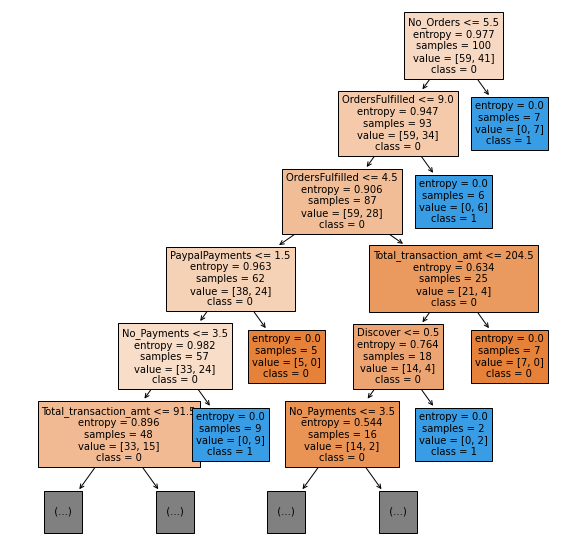

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

Text(0.5, 1.0, 'feature importance score')

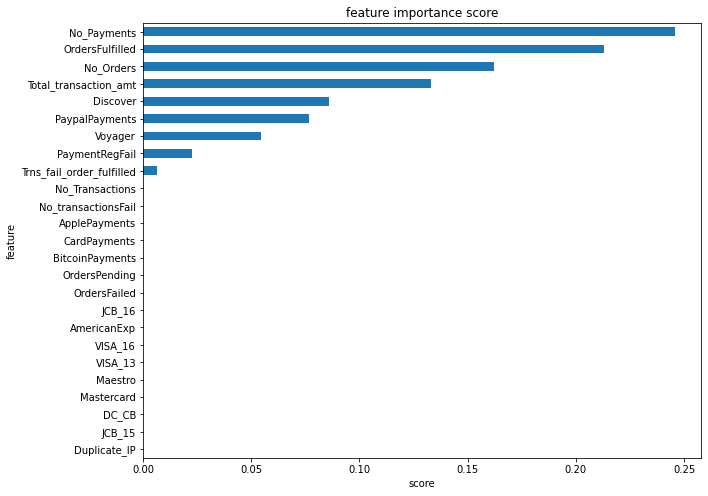

In [33]:
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')